In [77]:
import pandas as pd

In [78]:
df = pd.read_csv("AirPassengers.csv")

In [79]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [80]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [81]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [82]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [83]:
df.index = df['Month']
del df['Month']
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [84]:
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

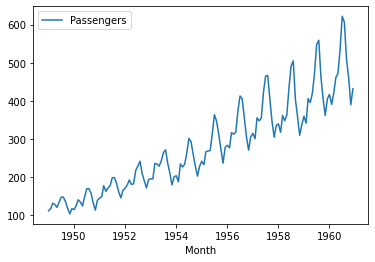

In [85]:
import seaborn as sns 
#sns.lineplot(x=df.index, y='Passengers', data=df)
sns.lineplot(data=df)

In [86]:
slp = (df.iloc[-1,0] - df.iloc[0,0]) / (len(df)-1)

In [87]:
import numpy as np
df['SimpleSlope'] = np.linspace(df.iloc[0,0], df.iloc[-1,0], len(df))
df.head()

,Passengers,SimpleSlope
Month,,
1949-01-01,112,112.000000
1949-02-01,118,114.237762
1949-03-01,132,116.475524
1949-04-01,129,118.713287
1949-05-01,121,120.951049


<AxesSubplot:xlabel='Month'>

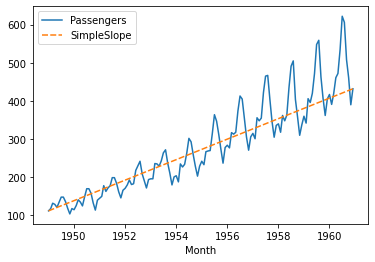

In [88]:
sns.lineplot(data=df)

In [89]:
df['Trend'] = range(1,len(df)+1)
df.head()

,Passengers,SimpleSlope,Trend
Month,,,
1949-01-01,112,112.000000,1
1949-02-01,118,114.237762,2
1949-03-01,132,116.475524,3
1949-04-01,129,118.713287,4
1949-05-01,121,120.951049,5


In [90]:
import statsmodels.formula.api as sm

model = sm.ols(formula="Passengers ~ Trend", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Thu, 26 May 2022   Prob (F-statistic):           4.02e-61
Time:                        18:09:53   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.6528      7.716     11.359      0.000      72.399     102.907
Trend          2.6572      0.092     28.778      0.000       2.475       2.840
==============================================================================
Omnibus:                       24.637   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.905
Skew:                           0.940   Prob(JB):                     4.34e-08
Kurtosis:                       4.454   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
results.params[1]

2.657183908045976

In [92]:
df['OLSSlope'] = results.params[0] + df['Trend']*results.params[1]
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope
Month,,,,
1949-01-01,112,112.000000,1,90.309962
1949-02-01,118,114.237762,2,92.967146
1949-03-01,132,116.475524,3,95.624330
1949-04-01,129,118.713287,4,98.281513
1949-05-01,121,120.951049,5,100.938697


In [93]:
dfplot = df.drop('Trend', axis=1)

<AxesSubplot:xlabel='Month'>

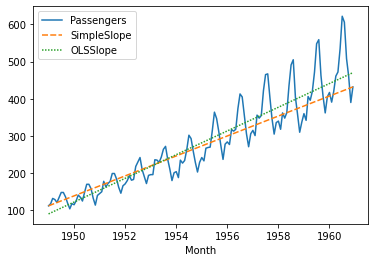

In [94]:
sns.lineplot(data=dfplot)

In [95]:
df['LogPassengers'] = np.log(df.Passengers)
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers
Month,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499
1949-02-01,118,114.237762,2,92.967146,4.770685
1949-03-01,132,116.475524,3,95.624330,4.882802
1949-04-01,129,118.713287,4,98.281513,4.859812
1949-05-01,121,120.951049,5,100.938697,4.795791


In [96]:
model = sm.ols(formula="LogPassengers ~ Trend", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogPassengers   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     1300.
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.41e-73
Time:                        18:09:54   Log-Likelihood:                 80.794
No. Observations:                 144   AIC:                            -157.6
Df Residuals:                     142   BIC:                            -151.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8137      0.023    206.648      0.000       4.768       4.860
Trend          0.0100      0.000     36.050      0.000       0.009       0.011
==============================================================================
Omnibus:                        3.750   Durbin-Watson:                   0.587
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.722
Skew:                           0.184   Prob(JB):                        0.256
Kurtosis:                       2.436   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
df['LogPsgOLS'] = results.params[0] + df['Trend']*results.params[1]

In [98]:
df['LogOLSSlope']=np.exp(df['LogPsgOLS'])
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope
Month,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699


<AxesSubplot:xlabel='Month'>

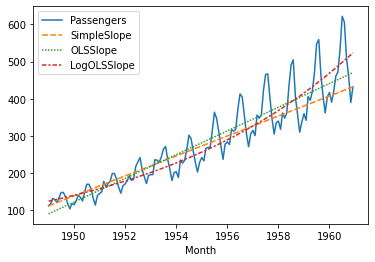

In [99]:
dfplot['LogOLSSlope'] = df.LogOLSSlope
sns.lineplot(data=dfplot)

In [100]:
df['MonthNum'] = df.index.month

In [101]:
df['LogChg'] = np.log(df.Passengers / df.Passengers.shift())

<AxesSubplot:xlabel='MonthNum', ylabel='LogChg'>

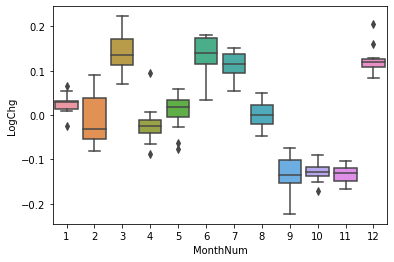

In [102]:
sns.boxplot(y="LogChg", x="MonthNum", data=df)

In [103]:
medians = df.filter(['MonthNum', 'LogChg']).groupby('MonthNum').median()
medians

,LogChg
MonthNum,
1,0.028988
2,-0.031428
3,0.135547
4,-0.023964
5,0.017882
6,0.139719
7,0.116310
8,0.000000
9,-0.134756


In [104]:
df = df.join(medians, on="MonthNum", how="left", lsuffix='', rsuffix='_median')
#df.merge(medians, how='left', on='MonthNum', suffixes=('','_median'))

df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median
Month,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882


In [105]:
means = df.filter(['MonthNum', 'LogChg']).groupby('MonthNum').mean()
df = df.join(means, on="MonthNum", how="left", lsuffix='', rsuffix='_mean')
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean
Month,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696


In [106]:
df['LogChg_median_cum'] = df['LogChg_median'].cumsum()
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean,LogChg_median_cum
Month,,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154,0.028988
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986,-0.002440
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296,0.133107
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200,0.109143
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696,0.127024


In [107]:
df['LogPsgOLSSeason'] = df['LogPsgOLS'] + df['LogChg_median_cum']

In [108]:
df['LogOLSSeasonSlope']=np.exp(df['LogPsgOLSSeason'])
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean,LogChg_median_cum,LogPsgOLSSeason,LogOLSSeasonSlope
Month,,,,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154,0.028988,4.852704,128.086293
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986,-0.002440,4.831325,125.376923
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296,0.133107,4.976920,145.027039
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200,0.109143,4.963004,143.022841
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696,0.127024,4.990934,147.073797


In [109]:
dfplot = df.filter(['Passengers', 'LogOLSSlope', 'LogOLSSeasonSlope'])

<AxesSubplot:xlabel='Month'>

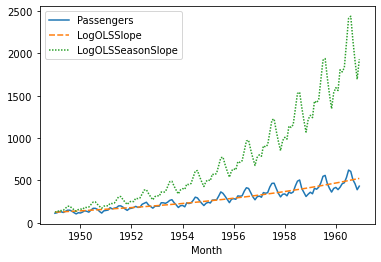

In [110]:
sns.lineplot(data=dfplot)

That's not good - how do we correct that?

We need to exclude the long term m/m change, because we are double-counting it in the seasonality calculation.

In [111]:
results.params[1]

0.010048381741695145

In [112]:
adjmedians = medians - results.params[1]

In [113]:
adjmedians

,LogChg
MonthNum,
1,0.018939
2,-0.041476
3,0.125499
4,-0.034013
5,0.007833
6,0.129671
7,0.106261
8,-0.010048
9,-0.144804


In [114]:
df = df.join(adjmedians, on="MonthNum", how="left", lsuffix='', rsuffix='_adjmedian')

df['LogChg_adjmedian_cum'] = df['LogChg_adjmedian'].cumsum()
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean,LogChg_median_cum,LogPsgOLSSeason,LogOLSSeasonSlope,LogChg_adjmedian,LogChg_adjmedian_cum
Month,,,,,,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154,0.028988,4.852704,128.086293,0.018939,0.018939
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986,-0.002440,4.831325,125.376923,-0.041476,-0.022537
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296,0.133107,4.976920,145.027039,0.125499,0.102962
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200,0.109143,4.963004,143.022841,-0.034013,0.068949
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696,0.127024,4.990934,147.073797,0.007833,0.076782


In [115]:
df['LogPsgOLSSeason'] = df['LogPsgOLS'] + df['LogChg_adjmedian_cum']

In [116]:
df['LogOLSSeasonSlope']=np.exp(df['LogPsgOLSSeason'])
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean,LogChg_median_cum,LogPsgOLSSeason,LogOLSSeasonSlope,LogChg_adjmedian,LogChg_adjmedian_cum
Month,,,,,,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154,0.028988,4.842656,126.805678,0.018939,0.018939
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986,-0.002440,4.811228,122.882402,-0.041476,-0.022537
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296,0.133107,4.946775,140.720416,0.125499,0.102962
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200,0.109143,4.922811,137.388245,-0.034013,0.068949
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696,0.127024,4.940693,139.867084,0.007833,0.076782


<AxesSubplot:xlabel='Month'>

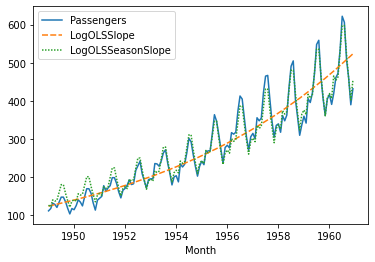

In [117]:
dfplot = df.filter(['Passengers', 'LogOLSSlope', 'LogOLSSeasonSlope'])
sns.lineplot(data=dfplot)

In [118]:
pd.get_dummies(df['MonthNum'], drop_first=True, prefix="M")

,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12
Month,,,,,,,,,,,
1949-01-01,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,0,0,0,0,0,0,1,0,0,0,0
1960-09-01,0,0,0,0,0,0,0,1,0,0,0
1960-10-01,0,0,0,0,0,0,0,0,1,0,0


In [119]:
#df=pd.concat([df, pd.get_dummies(df['MonthNum'], drop_first=True, prefix="M")], axis=1)

In [120]:
df2 = pd.get_dummies(df, columns=['MonthNum'], drop_first=True, prefix='M')

In [121]:
df2.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,LogChg,LogChg_median,LogChg_mean,...,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12
Month,,,,,,,,,,,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,NaN,0.028988,0.025154,...,0,0,0,0,0,0,0,0,0,0
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,0.052186,-0.031428,-0.011986,...,0,0,0,0,0,0,0,0,0,0
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,0.112117,0.135547,0.140296,...,1,0,0,0,0,0,0,0,0,0
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,-0.022990,-0.023964,-0.021200,...,0,1,0,0,0,0,0,0,0,0
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,-0.064022,0.017882,0.007696,...,0,0,1,0,0,0,0,0,0,0


In [122]:
dfX = df2.filter(['Trend', 'M_2', 'M_3', 'M_4'])
dfX

,Trend,M_2,M_3,M_4
Month,,,,
1949-01-01,1,0,0,0
1949-02-01,2,1,0,0
1949-03-01,3,0,1,0
1949-04-01,4,0,0,1
1949-05-01,5,0,0,0
...,...,...,...,...
1960-08-01,140,0,0,0
1960-09-01,141,0,0,0
1960-10-01,142,0,0,0


In [123]:
df2.filter(regex = "M_|Trend")

,Trend,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12
Month,,,,,,,,,,,,
1949-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,2,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,3,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,4,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,5,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,140,0,0,0,0,0,0,1,0,0,0,0
1960-09-01,141,0,0,0,0,0,0,0,1,0,0,0
1960-10-01,142,0,0,0,0,0,0,0,0,1,0,0


In [124]:
df2.filter(like='M_')

,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12
Month,,,,,,,,,,,
1949-01-01,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,0,0,0,0,0,0,1,0,0,0,0
1960-09-01,0,0,0,0,0,0,0,1,0,0,0
1960-10-01,0,0,0,0,0,0,0,0,1,0,0


In [125]:
pd.concat([df2.Trend, df2.filter(like='M_')], axis = 1)

,Trend,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12
Month,,,,,,,,,,,,
1949-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,2,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,3,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,4,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,5,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,140,0,0,0,0,0,0,1,0,0,0,0
1960-09-01,141,0,0,0,0,0,0,0,1,0,0,0
1960-10-01,142,0,0,0,0,0,0,0,0,1,0,0


In [126]:
import statsmodels.api as sm
dfX = df2.filter(regex = "M_|Trend")
dfX = sm.add_constant(dfX)

In [127]:
import statsmodels.api as sm

model = sm.OLS(df.LogPassengers, dfX, hasconst = True)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogPassengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     649.4
Date:                Thu, 26 May 2022   Prob (F-statistic):          2.31e-110
Time:                        18:09:56   Log-Likelihood:                 209.30
No. Observations:                 144   AIC:                            -392.6
Df Residuals:                     131   BIC:                            -354.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7268      0.019    250.180      0.000       4.689       4.764
Trend          0.0101      0.000     84.399      0.000       0.010       0.010
M_2           -0.0221      0.024     -0.911      0.364      -0.070       0.026
M_3            0.1082      0.024      4.468      0.000       0.060       0.156
M_4            0.0769      0.024      3.176      0.002       0.029       0.125
M_5            0.0745      0.024      3.078      0.003       0.027       0.122
M_6            0.1967      0.024      8.121      0.000       0.149       0.245
M_7            0.3006      0.024     12.411      0.000       0.253       0.349
M_8            0.2913      0.024     12.026      0.000       0.243       0.339
M_9            0.1467      0.024      6.054      0.000       0.099       0.195
M_10           0.0085      0.024      0.352      0.725      -0.039       0.056
M_11          -0.1352      0.024     -5.577      0.000      -0.183      -0.087
M_12          -0.0213      0.024     -0.879      0.381      -0.069       0.027
==============================================================================
Omnibus:                        2.692   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.412
Skew:                          -0.224   Prob(JB):                        0.299
Kurtosis:                       2.551   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
import statsmodels.formula.api as sm

model = sm.ols(formula="LogPassengers ~ Trend + C(MonthNum)", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogPassengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     649.4
Date:                Thu, 26 May 2022   Prob (F-statistic):          2.31e-110
Time:                        18:09:56   Log-Likelihood:                 209.30
No. Observations:                 144   AIC:                            -392.6
Df Residuals:                     131   BIC:                            -354.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.7268      0.019    250.180      0.000       4.689       4.764
C(MonthNum)[T.2]     -0.0221      0.024     -0.911      0.364      -0.070       0.026
C(MonthNum)[T.3]      0.1082      0.024      4.468      0.000       0.060       0.156
C(MonthNum)[T.4]      0.0769      0.024      3.176      0.002       0.029       0.125
C(MonthNum)[T.5]      0.0745      0.024      3.078      0.003       0.027       0.122
C(MonthNum)[T.6]      0.1967      0.024      8.121      0.000       0.149       0.245
C(MonthNum)[T.7]      0.3006      0.024     12.411      0.000       0.253       0.349
C(MonthNum)[T.8]      0.2913      0.024     12.026      0.000       0.243       0.339
C(MonthNum)[T.9]      0.1467      0.024      6.054      0.000       0.099       0.195
C(MonthNum)[T.10]     0.0085      0.024      0.352      0.725      -0.039       0.056
C(MonthNum)[T.11]    -0.1352      0.024     -5.577      0.000      -0.183      -0.087
C(MonthNum)[T.12]    -0.0213      0.024     -0.879      0.381      -0.069       0.027
Trend                 0.0101      0.000     84.399      0.000       0.010       0.010
==============================================================================
Omnibus:                        2.692   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.412
Skew:                          -0.224   Prob(JB):                        0.299
Kurtosis:                       2.551   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
results.fittedvalues

Month
1949-01-01    4.736849
1949-02-01    4.724863
1949-03-01    4.865159
1949-04-01    4.843959
1949-05-01    4.851655
                ...   
1960-08-01    6.427738
1960-09-01    6.293172
1960-10-01    6.165082
1960-11-01    6.031433
1960-12-01    6.155367
Length: 144, dtype: float64

In [130]:
df2['FinalReg'] = np.exp(results.fittedvalues)

<AxesSubplot:xlabel='Month'>

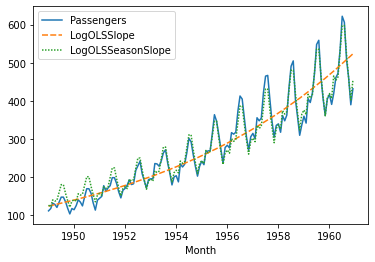

In [131]:
dfplot = df2.filter(['Passengers', 'LogOLSSlope', 'LogOLSSeasonSlope'])
sns.lineplot(data=dfplot)

<AxesSubplot:xlabel='Month'>

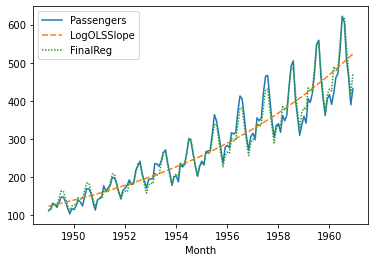

In [132]:
dfplot = df2.filter(['Passengers', 'LogOLSSlope', 'FinalReg'])
sns.lineplot(data=dfplot)

<AxesSubplot:xlabel='Month'>

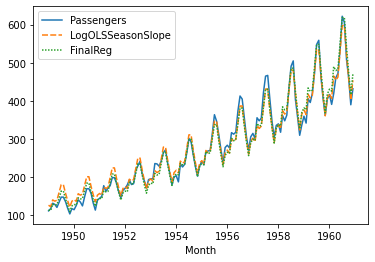

In [133]:
dfplot = df2.filter(['Passengers', 'LogOLSSeasonSlope', 'FinalReg'])
sns.lineplot(data=dfplot)

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

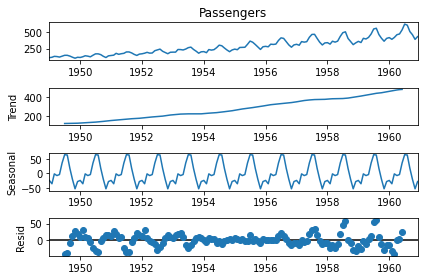

In [135]:
decompose = seasonal_decompose(df['Passengers'],model='additive', period=12)
decompose.plot()
plt.show()


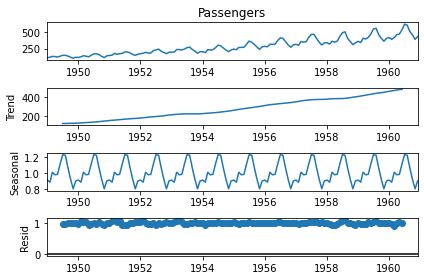

In [136]:
decompose = seasonal_decompose(df['Passengers'],model='multiplicative', period=12)
decompose.plot()
plt.show()

Getting out-of sample predictions from the Statsmodels formula API

In [137]:
df_ft = df[0:-12]

In [138]:
import statsmodels.formula.api as sm

model = sm.ols(formula="LogPassengers ~ Trend + C(MonthNum)", data=df_ft)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogPassengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     564.3
Date:                Thu, 26 May 2022   Prob (F-statistic):           9.62e-99
Time:                        18:09:58   Log-Likelihood:                 196.78
No. Observations:                 132   AIC:                            -367.6
Df Residuals:                     119   BIC:                            -330.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.7152      0.019    247.172      0.000       4.677       4.753
C(MonthNum)[T.2]     -0.0175      0.024     -0.716      0.475      -0.066       0.031
C(MonthNum)[T.3]      0.1189      0.024      4.859      0.000       0.070       0.167
C(MonthNum)[T.4]      0.0768      0.024      3.138      0.002       0.028       0.125
C(MonthNum)[T.5]      0.0728      0.024      2.972      0.004       0.024       0.121
C(MonthNum)[T.6]      0.1953      0.024      7.977      0.000       0.147       0.244
C(MonthNum)[T.7]      0.2957      0.024     12.075      0.000       0.247       0.344
C(MonthNum)[T.8]      0.2886      0.024     11.783      0.000       0.240       0.337
C(MonthNum)[T.9]      0.1475      0.024      6.021      0.000       0.099       0.196
C(MonthNum)[T.10]     0.0063      0.025      0.256      0.798      -0.042       0.055
C(MonthNum)[T.11]    -0.1346      0.025     -5.493      0.000      -0.183      -0.086
C(MonthNum)[T.12]    -0.0190      0.025     -0.776      0.439      -0.068       0.030
Trend                 0.0103      0.000     78.302      0.000       0.010       0.011
==============================================================================
Omnibus:                        3.685   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.891
Skew:                          -0.236   Prob(JB):                        0.236
Kurtosis:                       2.450   Cond. No.                         955.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
results.predict(df)

Month
1949-01-01    4.725516
1949-02-01    4.718293
1949-03-01    4.865056
1949-04-01    4.833244
1949-05-01    4.839496
                ...   
1960-08-01    6.446816
1960-09-01    6.316053
1960-10-01    6.185145
1960-11-01    6.054551
1960-12-01    6.180453
Length: 144, dtype: float64

Getting out-of sample predictions from the Statsmodels other API

In [140]:
df_ft = df[0:-12]

In [141]:
dfX_ft = dfX[0:-12]

In [142]:
import statsmodels.api as sm

model = sm.OLS(df_ft.LogPassengers, dfX_ft, hasconst = True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogPassengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     564.3
Date:                Thu, 26 May 2022   Prob (F-statistic):           9.62e-99
Time:                        18:09:58   Log-Likelihood:                 196.78
No. Observations:                 132   AIC:                            -367.6
Df Residuals:                     119   BIC:                            -330.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7152      0.019    247.172      0.000       4.677       4.753
Trend          0.0103      0.000     78.302      0.000       0.010       0.011
M_2           -0.0175      0.024     -0.716      0.475      -0.066       0.031
M_3            0.1189      0.024      4.859      0.000       0.070       0.167
M_4            0.0768      0.024      3.138      0.002       0.028       0.125
M_5            0.0728      0.024      2.972      0.004       0.024       0.121
M_6            0.1953      0.024      7.977      0.000       0.147       0.244
M_7            0.2957      0.024     12.075      0.000       0.247       0.344
M_8            0.2886      0.024     11.783      0.000       0.240       0.337
M_9            0.1475      0.024      6.021      0.000       0.099       0.196
M_10           0.0063      0.025      0.256      0.798      -0.042       0.055
M_11          -0.1346      0.025     -5.493      0.000      -0.183      -0.086
M_12          -0.0190      0.025     -0.776      0.439      -0.068       0.030
==============================================================================
Omnibus:                        3.685   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.891
Skew:                          -0.236   Prob(JB):                        0.236
Kurtosis:                       2.450   Cond. No.                         955.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
results.predict(dfX)

Month
1949-01-01    4.725516
1949-02-01    4.718293
1949-03-01    4.865056
1949-04-01    4.833244
1949-05-01    4.839496
                ...   
1960-08-01    6.446816
1960-09-01    6.316053
1960-10-01    6.185145
1960-11-01    6.054551
1960-12-01    6.180453
Length: 144, dtype: float64

In [144]:
df.head()

,Passengers,SimpleSlope,Trend,OLSSlope,LogPassengers,LogPsgOLS,LogOLSSlope,MonthNum,LogChg,LogChg_median,LogChg_mean,LogChg_median_cum,LogPsgOLSSeason,LogOLSSeasonSlope,LogChg_adjmedian,LogChg_adjmedian_cum
Month,,,,,,,,,,,,,,,,
1949-01-01,112,112.000000,1,90.309962,4.718499,4.823717,124.426685,1,NaN,0.028988,0.025154,0.028988,4.842656,126.805678,0.018939,0.018939
1949-02-01,118,114.237762,2,92.967146,4.770685,4.833765,125.683274,2,0.052186,-0.031428,-0.011986,-0.002440,4.811228,122.882402,-0.041476,-0.022537
1949-03-01,132,116.475524,3,95.624330,4.882802,4.843813,126.952554,3,0.112117,0.135547,0.140296,0.133107,4.946775,140.720416,0.125499,0.102962
1949-04-01,129,118.713287,4,98.281513,4.859812,4.853862,128.234653,4,-0.022990,-0.023964,-0.021200,0.109143,4.922811,137.388245,-0.034013,0.068949
1949-05-01,121,120.951049,5,100.938697,4.795791,4.863910,129.529699,5,-0.064022,0.017882,0.007696,0.127024,4.940693,139.867084,0.007833,0.076782


In [148]:
df2['Psg_OOS'] = np.exp(results.predict(dfX))

In [149]:
df2.columns

Index(['Passengers', 'SimpleSlope', 'Trend', 'OLSSlope', 'LogPassengers',
       'LogPsgOLS', 'LogOLSSlope', 'LogChg', 'LogChg_median', 'LogChg_mean',
       'LogChg_median_cum', 'LogPsgOLSSeason', 'LogOLSSeasonSlope',
       'LogChg_adjmedian', 'LogChg_adjmedian_cum', 'M_2', 'M_3', 'M_4', 'M_5',
       'M_6', 'M_7', 'M_8', 'M_9', 'M_10', 'M_11', 'M_12', 'FinalReg',
       'Psg_OOS'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

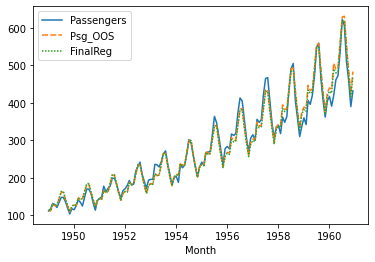

In [150]:
dfplot = df2.filter(['Passengers', 'Psg_OOS', 'FinalReg'])
sns.lineplot(data=dfplot)

<AxesSubplot:xlabel='Month'>

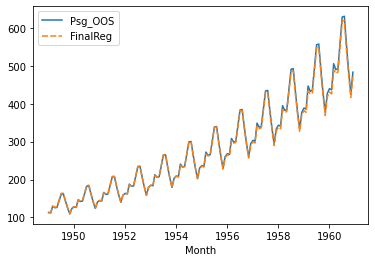

In [151]:
dfplot = df2.filter(['Psg_OOS', 'FinalReg'])
sns.lineplot(data=dfplot)